In [1]:
from scipy.optimize import curve_fit
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import numpy as np
from run_evolution_experiment import DataFromExperiment

def power_law(x, a, b):
    return a*np.power(x, b)

def plot_data(title, first_size):
    with open('experiment_data/' +title +'.pickle', 'rb') as f:
        data = pickle.load(f)
    size_to_index_dict = {size: index for index, size in enumerate(data.sizes)}

    #actual fitting to power power_law
    pars_mutations, cov_mutations = curve_fit(f=power_law, xdata=data.sizes[size_to_index_dict[first_size]:], ydata=data.medians_mutations[size_to_index_dict[first_size]:], p0=[0,0], bounds=(-np.inf, np.inf))

    print(pars_mutations)
    perr_mutations = np.sqrt(np.diag(cov_mutations))
    print(perr_mutations)
    print("r^2 = ", metrics.r2_score(data.medians_mutations[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_mutations)))
    fig, ax = plt.subplots(1, 1)
    ax.loglog(data.sizes, data.medians_mutations,  label="Median Mutations Until Fixation")
    ax.loglog(data.sizes[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_mutations), label="Power Law Fit: " +str(pars_mutations[0])[:5] +" * size^" +str(pars_mutations[1])[:5])
    ax.legend(bbox_to_anchor=(0.8, 1.1))
    fig.savefig('medianMutationsTillFixationAndWithFittedPlot_'+title+'.png', dpi=1200)
    plt.show()

    pars_time, cov_times = curve_fit(f=power_law, xdata=data.sizes[size_to_index_dict[10]:], ydata=data.medians_times[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
    perr_times = np.sqrt(np.diag(cov_times))
    print(perr_times)
    fig, ax = plt.subplots(1, 1)
    print(pars_time)
    print("r^2 = ", metrics.r2_score(data.medians_times[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_time)))
    ax.loglog(data.sizes, data.medians_times, label="Median Time Until Fixation")
    ax.loglog(data.sizes[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_time), label="Power Law Fit: " +str(pars_time[0])[:5] +" * size^" +str(pars_time[1])[:5])
    ax.legend(bbox_to_anchor=(0.8, 1.1))
    fig.savefig('medianTimeTillFixationAndWithFittedPlot_'+title+'.png', dpi=1200)
    plt.show()

    counter_list = [(key, value['total']) for key, value in data.isomorphism_counter.counter.items()]
    counter_list.sort(key= lambda x:x[1], reverse=True)
    figs, axs = plt.subplots(5, 1, sharex=True, sharey=True)
    for ax, network in zip(axs, counter_list[:5]):
        ax.plot(data.sizes, [data.isomorphism_counter.get_number_by_size(size)[network[0]] for size in data.sizes])
    plt.plot()

    pars_distance, cov_distance = curve_fit(f=power_law, xdata=data.sizes[size_to_index_dict[10]:], ydata=data.medians_final_distance[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
    perr_distance = np.sqrt(np.diag(cov_times))
    print(perr_distance)
    fig, ax = plt.subplots(1, 1)
    print(pars_distance)
    print("r^2 = ", metrics.r2_score(data.medians_final_distance[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_distance)))
    ax.loglog(data.sizes, data.medians_final_distance, label="Median Distance From Fixation")
    ax.loglog(data.sizes[size_to_index_dict[first_size]:], power_law(data.sizes[size_to_index_dict[first_size]:], *pars_distance), label="Power Law Fit: " +str(pars_distance[0])[:5] +" * size^" +str(pars_distance[1])[:5])
    ax.legend(bbox_to_anchor=(0.8, 1.1))
    fig.savefig('medianDistanceTillFixationAndWithFittedPlot_'+title+'.png', dpi=1200)
    plt.show()


First and

[7.48171125 0.97714309]
[1.54308024 0.0314201 ]
r^2 =  0.9941782785556204


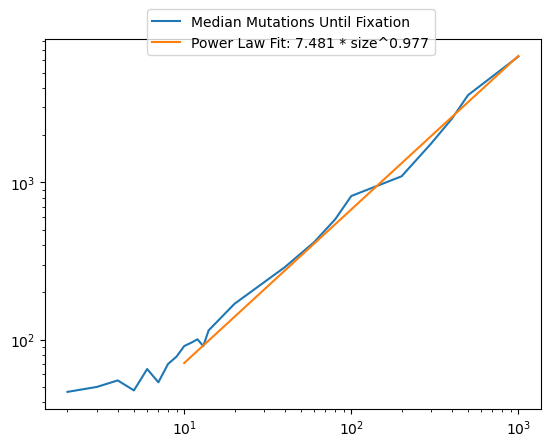

[0.34829728 0.0183348 ]
[ 4.57032446 -0.05851286]
r^2 =  0.44496643629528365


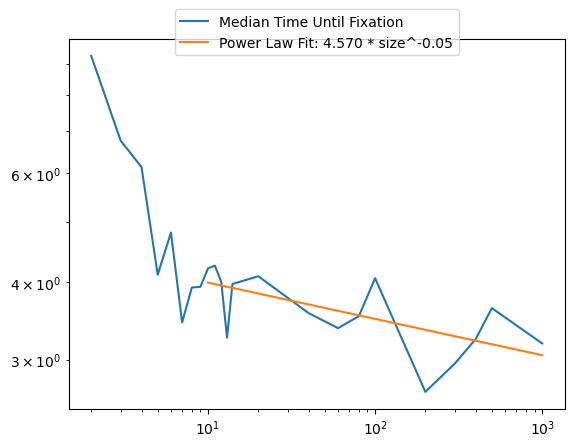

[0.34829728 0.0183348 ]
[0.49657441 0.38400793]
r^2 =  0.8436482384678745


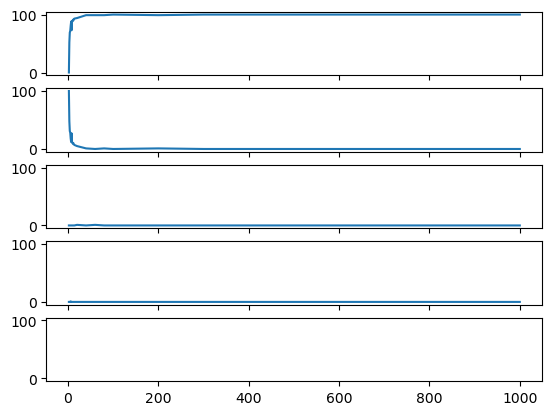

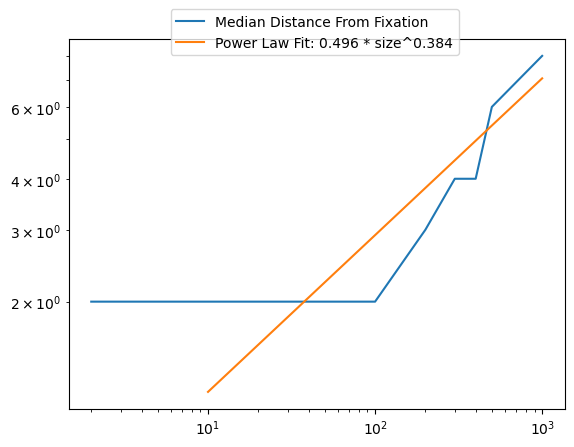

In [2]:
plot_data('and', 10)

[432.0550863    0.98062875]
[2.30022503e+01 8.10828198e-03]
r^2 =  0.9996127933472738


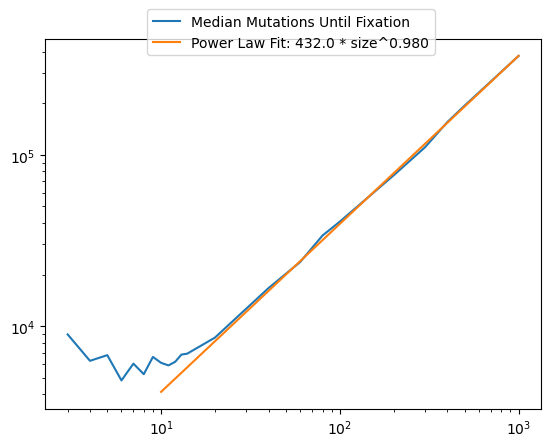

[1.78259229e+01 1.43333663e-02]
[ 3.07906314e+02 -8.51877809e-02]
r^2 =  0.7348397151261179


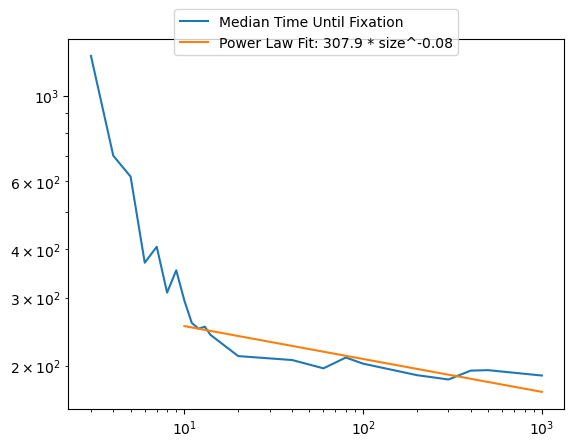

[1.78259229e+01 1.43333663e-02]
[0.46102709 0.95358084]
r^2 =  0.9992509728362287


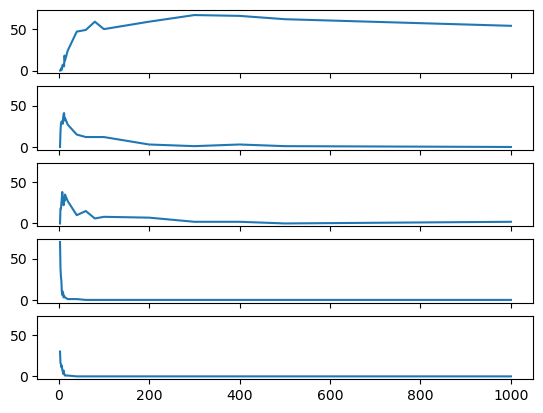

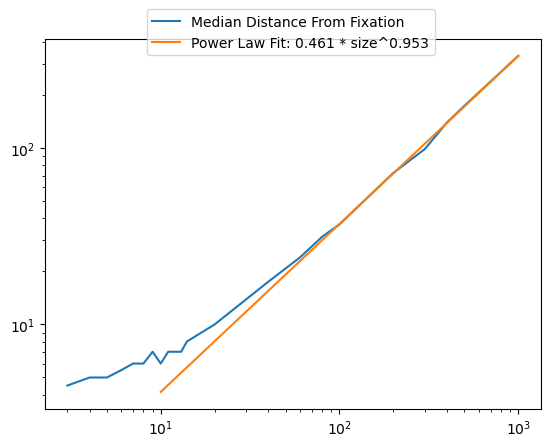

In [3]:
plot_data('or', 10)


[4.26672327 1.06479247]
[1.18390221 0.04198002]
r^2 =  0.9914185882066654


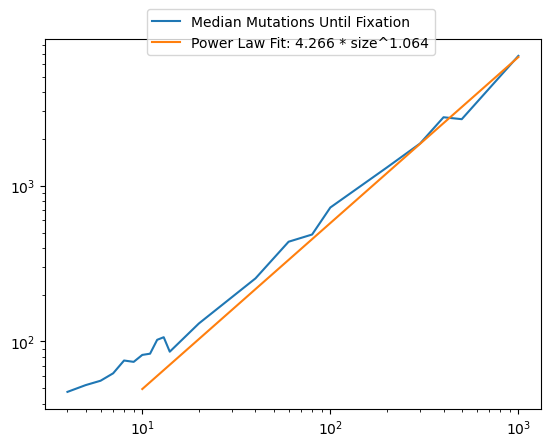

[0.24755332 0.01507828]
[ 3.83995507 -0.03208498]
r^2 =  0.2598620539080865


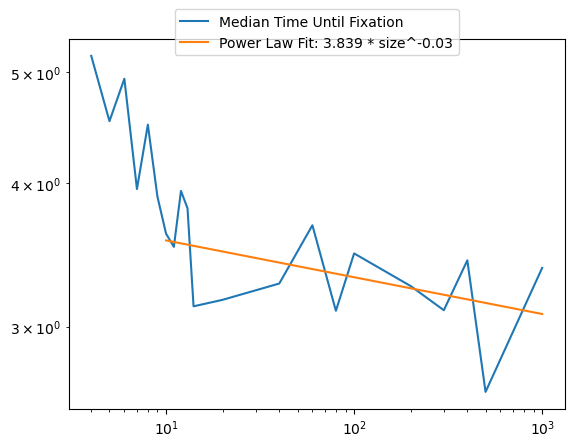

[0.24755332 0.01507828]
[0.52678539 0.37473786]
r^2 =  0.8374759784279064


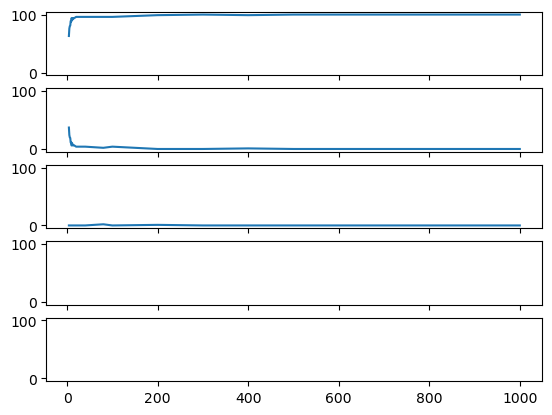

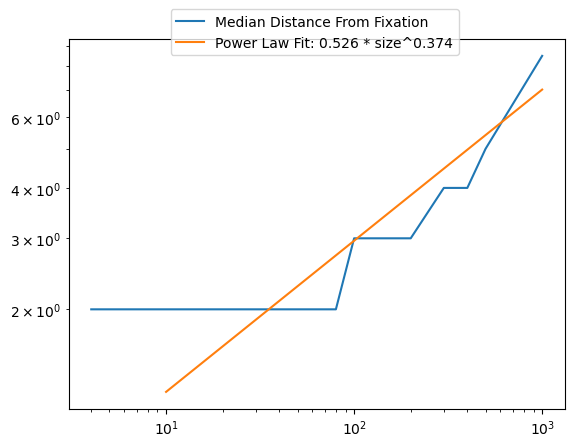

In [4]:
plot_data('nor', 10)

[4.24308441e+03 7.69812248e-01]
[1.83671109e+03 8.21595937e-02]
r^2 =  0.9294493840145001


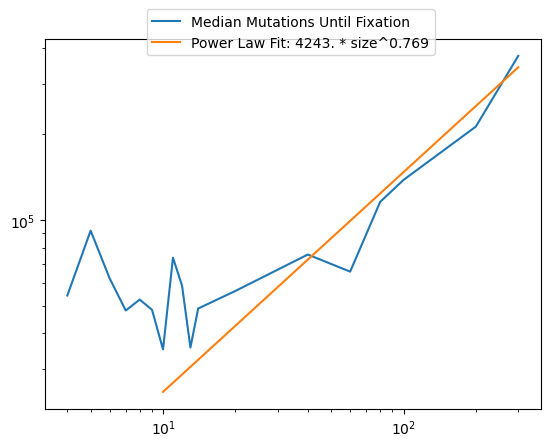

[3.75127769e+03 1.61402884e-01]
[ 8.4458188e+03 -5.7597921e-01]
r^2 =  0.7061049282974623


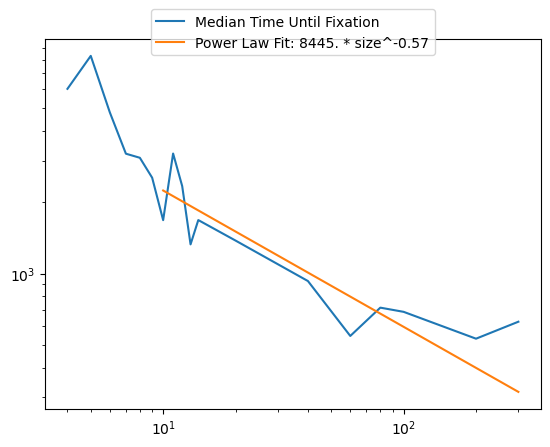

[3.75127769e+03 1.61402884e-01]
[1.28646691 0.93675695]
r^2 =  0.9909854775967705


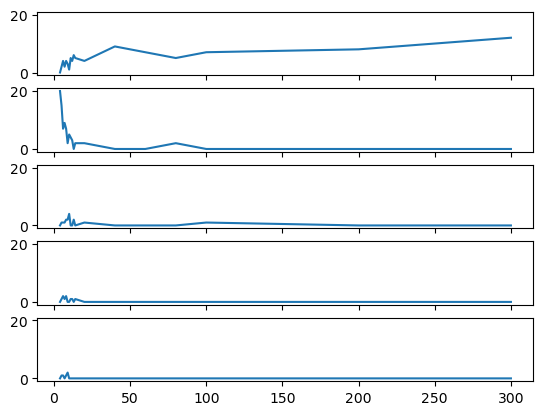

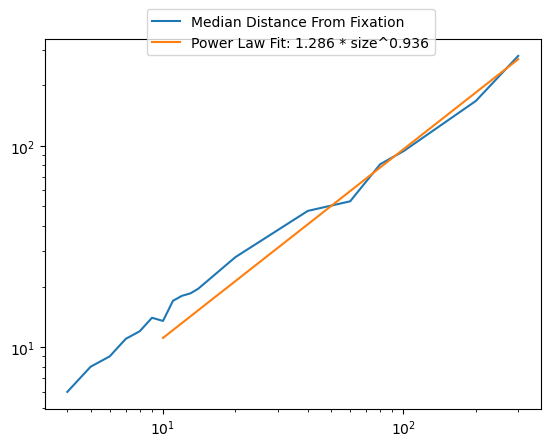

In [5]:
plot_data('xor', 10)

[4.93173941e+03 7.34613402e-01]
[9.01409483e+02 3.48882782e-02]
r^2 =  0.9859120941857875


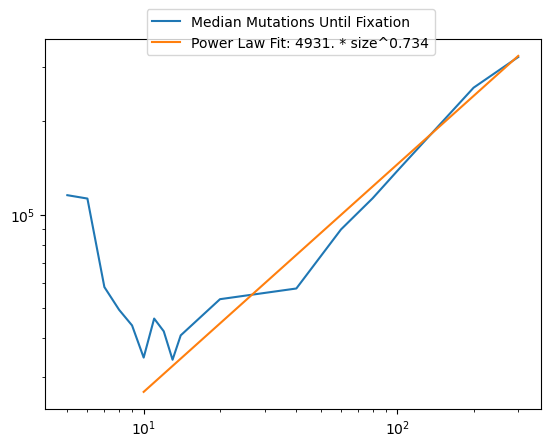

[7.99677203e+02 6.11211636e-02]
[ 4.49122916e+03 -4.20173061e-01]
r^2 =  0.877487108035614


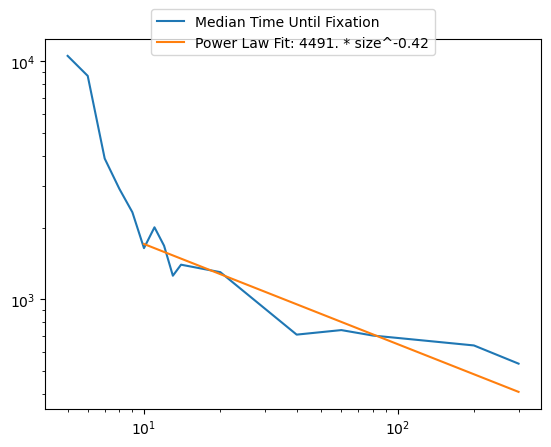

[7.99677203e+02 6.11211636e-02]
[2.16830655 0.82289222]
r^2 =  0.996547202964545


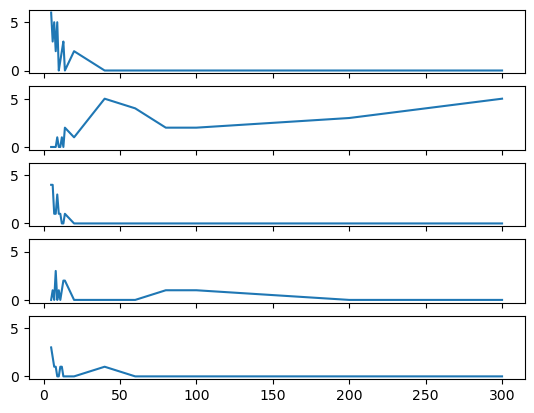

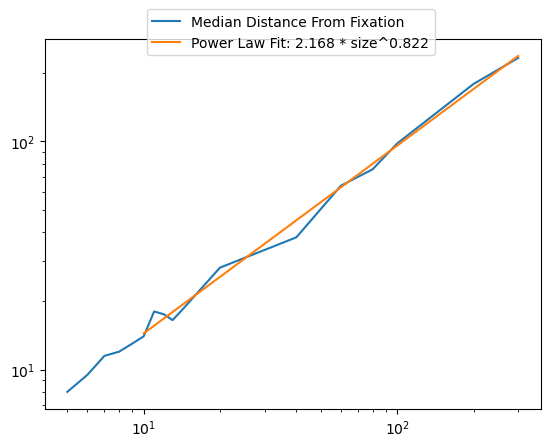

In [6]:
plot_data('xnor', 10)
